In [5]:
import numpy as np 
import pandas as pd 
import pathlib

import os
import gc
print(os.listdir("/Users/artyomarnaut/Documents/BoatRecognize/boat-types-recognition"))

from sklearn.metrics import confusion_matrix
from fastai import *
from fastai.vision import *

['.DS_Store', 'boats']


In [6]:
DATA_DIR='/Users/artyomarnaut/Documents/BoatRecognize/boat-types-recognition/boats'

In [7]:
os.listdir(f'{DATA_DIR}')

['inflatable boat',
 'gondola',
 'boats',
 'paper boat',
 'kayak',
 'sailboat',
 'ferry boat',
 'freight boat',
 'cruise ship']

In [8]:
data = ImageDataBunch.from_folder(DATA_DIR, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=True, max_warp=0),
                                  size=224,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [9]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['buoy', 'cruise ship', 'ferry boat', 'freight boat', 'gondola', 'inflatable boat', 'kayak', 'paper boat', 'sailboat']


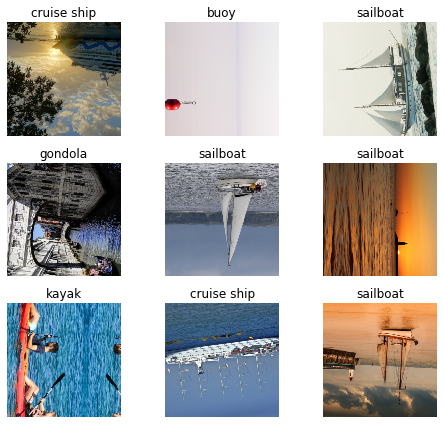

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy, model_dir="/tmp/model/")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/artyomarnaut/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:08<00:00, 10.4MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


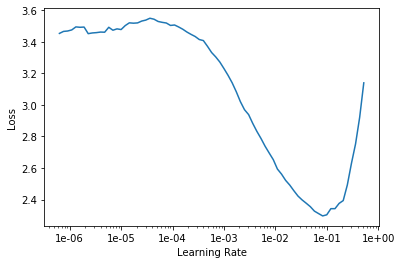

In [12]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(6,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.140090,1.057797,0.763699,08:22
1,1.515781,1.097877,0.743151,08:27
2,1.259375,1.078083,0.753425,08:20
3,1.071269,0.833766,0.770548,08:27
4,0.904129,0.724173,0.791096,08:22
5,0.773289,0.668943,0.797945,08:23


In [14]:
learn.save('stage-1')

In [15]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


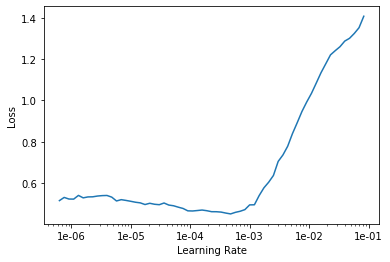

In [16]:
learn.lr_find()
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3 ))

epoch,train_loss,valid_loss,accuracy,time
0,0.517444,0.595583,0.815068,10:55
1,0.457241,0.603905,0.821918,10:54
2,0.441314,0.553113,0.825342,10:51
3,0.419792,0.553282,0.815068,10:47


In [18]:
learn.save('stage-2')

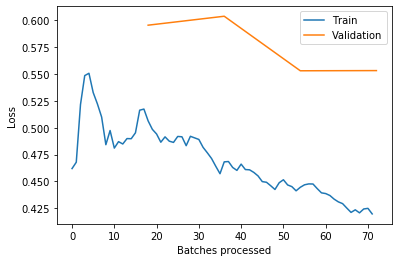

In [19]:
learn.recorder.plot_losses()

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

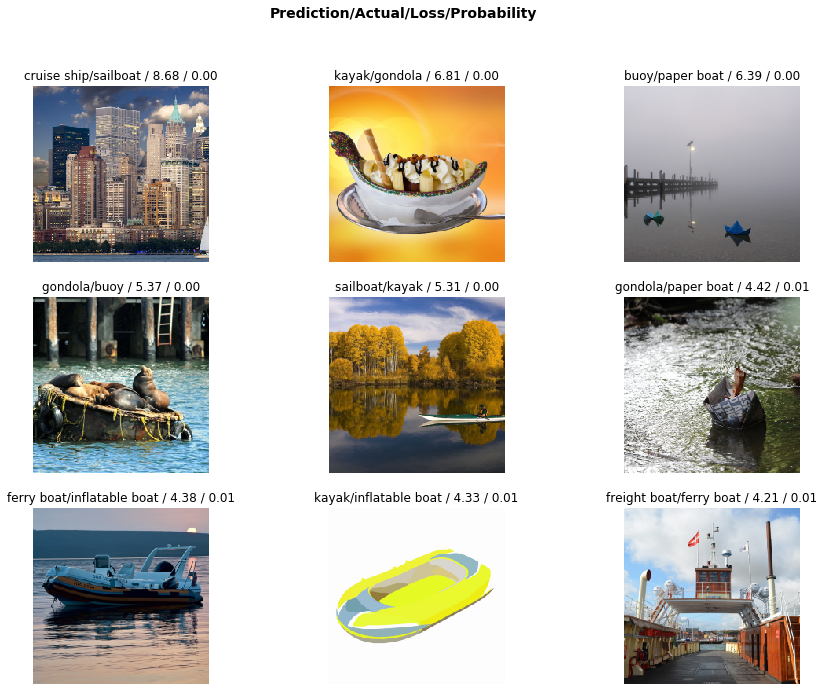

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

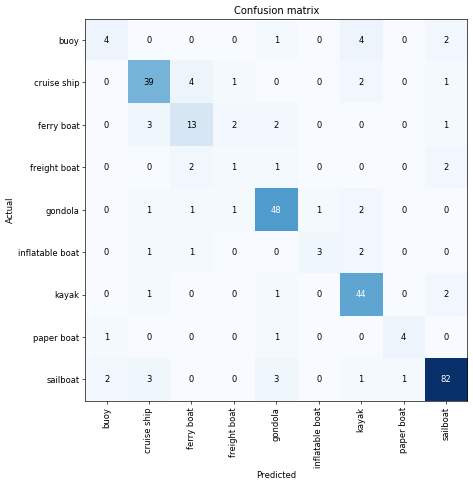

In [23]:
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)